# Notes for 28 September 

Today we'll do more with images

In [1]:
%matplotlib inline
import numpy as np
import pylab

First let's grab an image of Frederick Phillips Brooks.

In [2]:
import urllib
urllib.request.urlretrieve('https://goo.gl/9c5MHC', filename='fpb.jpg')

('fpb.jpg', <http.client.HTTPMessage at 0x10a6f8ac8>)

Then we can read it with a function from pylab. The image is a 3D array. (rows, columns, channels)

In [4]:
fpb = pylab.imread('fpb.jpg')
print(fpb.shape)

(165, 305, 3)


And we can display it with our usual helper.

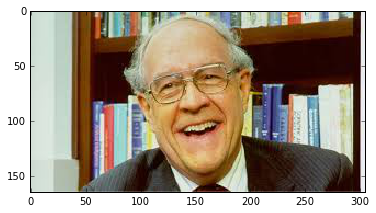

In [5]:
def show(im):
    pylab.imshow(im, cmap=pylab.gray(), interpolation='none')
    
show(fpb)

We can pull out the red channel.

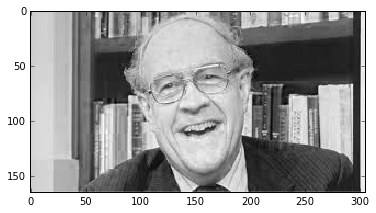

In [6]:
show(fpb[:, :, 0])

The green channel.

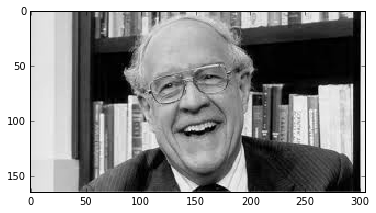

In [7]:
show(fpb[:, :, 1])

The **pixels** are just numbers. Below I display the green channel of the first column.

In [8]:
fpb[:, 0, 1]

array([218, 218, 218, 218, 218, 218, 218, 218, 218, 218, 218, 218, 218,
       218, 218, 218, 218, 218, 218, 218, 218, 218, 218, 218, 220, 220,
       220, 220, 220, 220, 220, 220, 219, 219, 219, 219, 219, 219, 219,
       219, 221, 221, 221, 221, 221, 221, 221, 221, 220, 220, 220, 220,
       220, 220, 220, 220, 220, 220, 220, 220, 220, 220, 220, 220, 220,
       220, 220, 220, 220, 220, 220, 220, 221, 221, 221, 221, 221, 221,
       221, 221, 222, 222, 222, 222, 222, 222, 222, 222, 222, 222, 222,
       222, 222, 222, 222, 222, 222, 222, 222, 222, 222, 222, 222, 222,
       223, 223, 223, 223, 223, 223, 223, 223, 223, 223, 223, 223, 223,
       223, 223, 223, 223, 223, 223, 223, 223, 223, 223, 223, 226, 225,
       225, 225, 224, 224, 223, 223, 217, 217, 217, 217, 217, 217, 217,
       217, 219, 219, 219, 219, 219, 219, 219, 219, 220, 220, 220, 220,
       220, 220, 220, 220, 220, 220, 220, 220, 220], dtype=uint8)

We can convert the RGB image to luminance with an approximation of the weight of each channel.

In [13]:
lum = 0.2 * fpb[:, :, 0] + 0.7 * fpb[:, :, 1] + 0.1 * fpb[:, :, 2]
lum.shape

(165, 305)

We can get the max luminance.

In [11]:
np.max(lum)

250.59999999999999

And the min.

In [12]:
np.min(lum)

1.4000000000000001

We can convert it to a binary image by thresholding it.

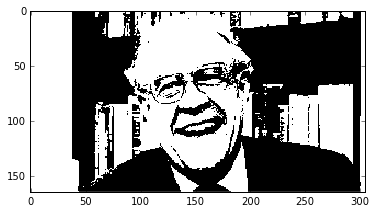

In [14]:
show(lum > 128)

Choosing different thresholds washes out different parts of the image.

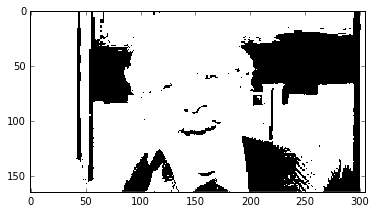

In [13]:
show(lum > 50)

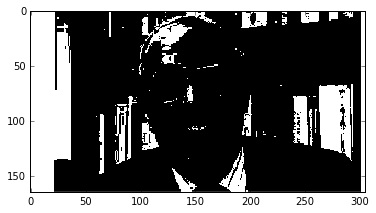

In [14]:
show(lum > 200)

In [15]:
np.min(lum)

1.4000000000000001

We can rescale the luminance to be between 0 and 1 by subtracting off the min and dividing by the max.

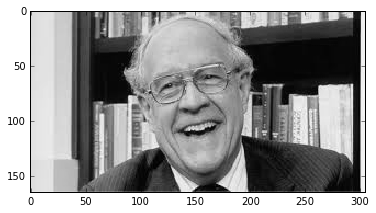

In [16]:
lum = lum - np.min(lum)
lum = lum / np.max(lum)
show(lum)

Here is a row through the image.

In [17]:
lum[85, :]

array([ 0.87319422,  0.87720706,  0.8812199 ,  0.88523274,  0.88924559,
        0.89325843,  0.89727127,  0.89727127,  0.89727127,  0.89727127,
        0.89727127,  0.90128411,  0.90128411,  0.90128411,  0.90529695,
        0.90529695,  0.91131621,  0.90329053,  0.90329053,  0.90730337,
        0.90850722,  0.88844302,  0.84831461,  0.81219904,  0.83547352,
        0.83547352,  0.83547352,  0.83547352,  0.83667737,  0.83667737,
        0.83667737,  0.8382825 ,  0.83226324,  0.83266453,  0.83988764,
        0.84149278,  0.820626  ,  0.605939  ,  0.31861958,  0.29253612,
        0.26725522,  0.36918138,  0.29815409,  0.12800963,  0.11035313,
        0.2094703 ,  0.26364366,  0.26083467,  0.27849117,  0.29494382,
        0.2676565 ,  0.27207063,  0.30738363,  0.25481541,  0.1565008 ,
        0.11717496,  0.15288925,  0.27287319,  0.35313002,  0.42696629,
        0.54093098,  0.56260032,  0.50601926,  0.48154093,  0.50441413,
        0.43619583,  0.25361156,  0.25200642,  0.30617978,  0.31

We can plot that line of intensities.

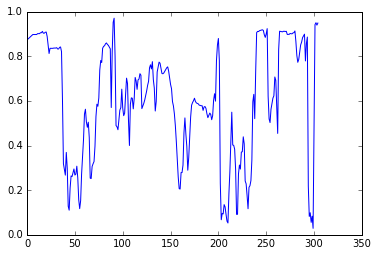

In [18]:
pylab.plot(lum[85, :])

We could make an image from random numbers.

In [19]:
oh= np.random.random(lum.shape)

In [20]:
oh

array([[ 0.96251415,  0.6409358 ,  0.64990443, ...,  0.07851179,
         0.26835602,  0.94110651],
       [ 0.99931026,  0.26257052,  0.37306383, ...,  0.22735425,
         0.29623509,  0.96538416],
       [ 0.64470596,  0.13048666,  0.72605348, ...,  0.53957492,
         0.24423614,  0.45164499],
       ..., 
       [ 0.69665252,  0.13973854,  0.50779377, ...,  0.22019401,
         0.47608427,  0.2695598 ],
       [ 0.93857661,  0.01209383,  0.28471575, ...,  0.90693171,
         0.51211019,  0.78490259],
       [ 0.99155691,  0.21833686,  0.80551428, ...,  0.87495608,
         0.58215422,  0.21377176]])

We talked about down sampling the image.

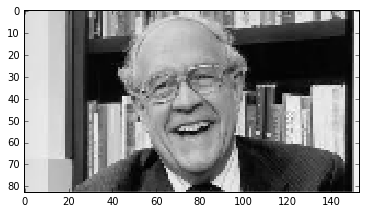

In [21]:
show(lum[::2, ::2])

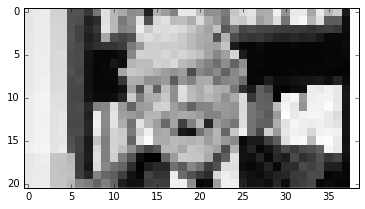

In [22]:
show(lum[::8, ::8])

Let's go back to our binary image.

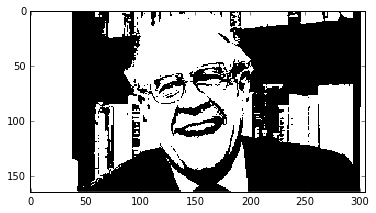

In [23]:
show(lum > 0.5)

Let's threshold it with some added noise. Notice that we get a better approximation to the original image by adding noise to reveal some of the shades of gray

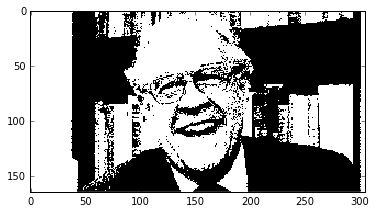

In [24]:
noise = 2 * np.random.random(lum.shape) - 1
show(lum + 0.1 * noise > 0.5)

More noise gives us more shades of gray but makes for a noisier picture.

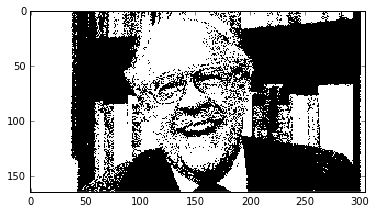

In [25]:
show(lum + 0.2 * noise > 0.5)